<a href="https://colab.research.google.com/github/Reema-Almadhi/heart-disease-prediction/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [604]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Load data

In [605]:
# update path below to your own path
df = pd.read_csv('/content/drive/MyDrive/Heart-disease/heart.csv')

# rename target column to match original code usage
df = df.rename(columns={'target': 'disease_present'})

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease_present
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Check for missing values

In [606]:
missing = df.isnull().sum()

if missing.sum() > 0:
    plt.figure(figsize=(8,6))
    missing[missing > 0].sort_values().plot(kind='barh')
    plt.title("Missing Values per Feature")
    plt.show()

**Exploratory Data Analysis**

examining class distribution, feature distributions, and correlations before modeling.

Pie-chart of Target feature



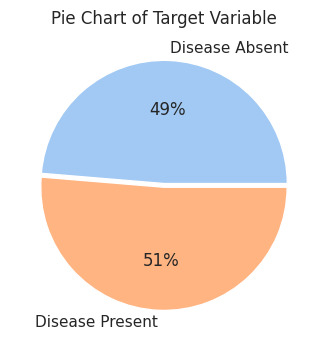

In [620]:
unique_values = df['disease_present'].unique()
counts = df['disease_present'].value_counts().sort_values()
percentages = counts / counts.sum() * 100
plt.figure(figsize=(6,4))
plt.pie(percentages, labels=['Disease Absent', 'Disease Present'],
        colors=sns.color_palette('pastel'), explode=[0.02,0.01], autopct='%.0f%%')
plt.title('Pie Chart of Target Variable')
plt.show()

Box Plot of Health Variables

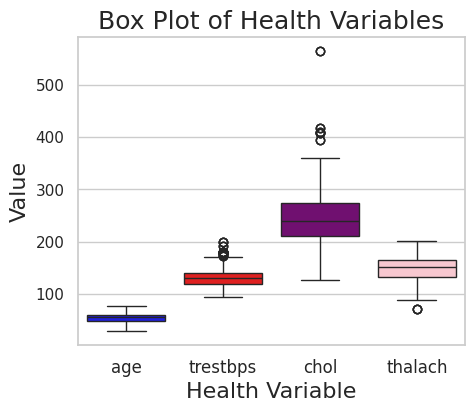

In [621]:
health_variables = ['age', 'trestbps', 'chol', 'thalach']
colors = ['blue', 'red', 'purple', 'pink']
sns.set(style="whitegrid")
plt.figure(figsize=(5,4))
ax = sns.boxplot(data=df[health_variables], palette=colors)
ax.set_xticks(range(len(health_variables)))
ax.set_xticklabels(health_variables, fontsize=12)
ax.set_xlabel('Health Variable', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax.set_title('Box Plot of Health Variables', fontsize=18)
plt.show()

Correlation Matrix Heatmap

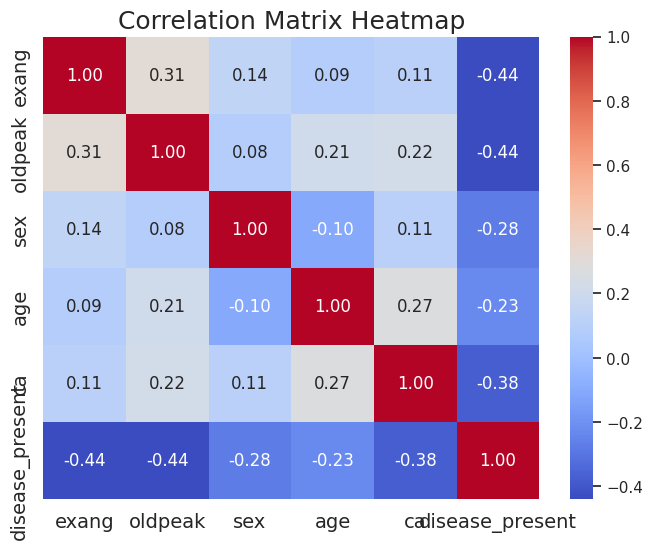

In [624]:
features_analysis=['exang', 'oldpeak', 'sex', 'age', 'ca', 'disease_present'] # Selected features based on highest correlation with heart disease

df[i] = pd.to_numeric(df[i], errors='coerce')

subset_data = df[features_analysis]

correlation_matrix = subset_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Classification Models**

Feature and target separation + train/test split + scaling


In [610]:
X = df.iloc[:, :-1].values # Features
y = df.iloc[:, -1].values # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #80/20 split - fixed seed for reproducibility

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


SVM


Training Accuracy (SVM): 94.88%
Test Accuracy (SVM): 96.59%

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        98
           1       0.95      0.99      0.97       107

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205


Cross-Validation Scores: [0.93902439 0.90853659 0.84146341 0.91463415 0.90243902]
Mean CV Accuracy: 90.12%
CV Std Dev: 0.0324


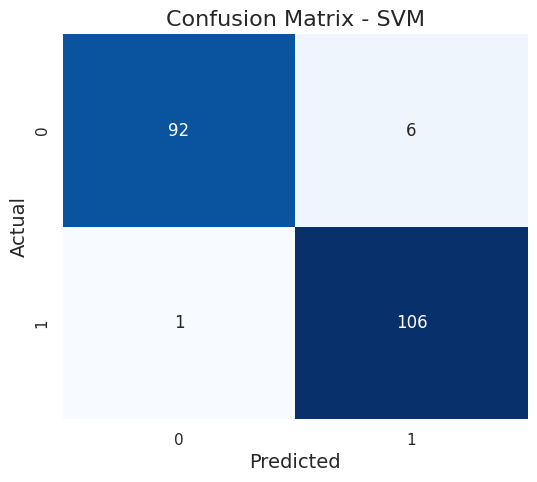

In [611]:

# Initialize model
svm = SVC(kernel='rbf', random_state=0)

# Train model
svm.fit(X_train, y_train)

# Predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\nTraining Accuracy (SVM): {train_accuracy:.2%}")
print(f"Test Accuracy (SVM): {test_accuracy:.2%}")

# Classification report
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test))

# Cross-validation
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.2%}")
print(f"CV Std Dev: {cv_scores.std():.4f}")

# Plot confusion matrix (Test Set)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

# Store for comparison
svm_accuracy = test_accuracy * 100
svm_precision = precision_score(y_test, y_pred_test) * 100
svm_recall = recall_score(y_test, y_pred_test) * 100
svm_f1 = f1_score(y_test, y_pred_test) * 100

Logistic Regression


Training Accuracy: 85.85%
Test Accuracy: 86.34%

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205


Cross-Validation Scores: [0.87804878 0.87195122 0.79878049 0.8902439  0.79878049]
Mean CV Accuracy: 84.76% 
CV Std Dev: 0.0403 



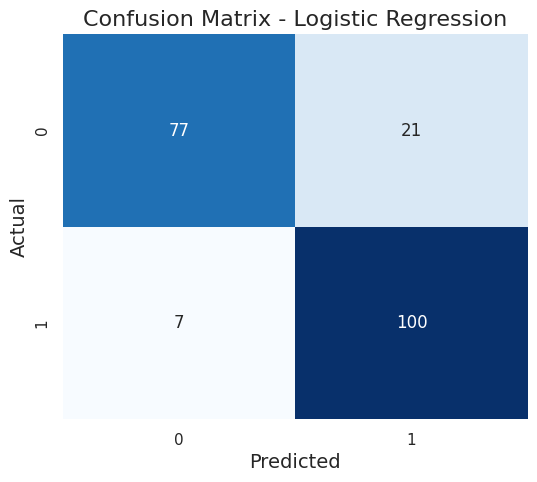

In [612]:
# Train model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\nTraining Accuracy: {train_accuracy:.2%}")
print(f"Test Accuracy: {test_accuracy:.2%}")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test))

# Cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.2%} ")
print(f"CV Std Dev: {cv_scores.std():.4f} \n")

# plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

# Store for comparison
lr_accuracy = test_accuracy * 100
lr_precision = precision_score(y_test, y_pred_test) * 100
lr_recall = recall_score(y_test, y_pred_test) * 100
lr_f1 = f1_score(y_test, y_pred_test) * 100

XGBoost


Training Accuracy (XGBoost): 89.02%
Test Accuracy (XGBoost): 89.76%

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        98
           1       0.88      0.93      0.90       107

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205


Cross-Validation Scores: [0.88414634 0.87804878 0.8597561  0.90243902 0.82926829]
Mean CV Accuracy: 87.07%
CV Std Dev: 0.0248 



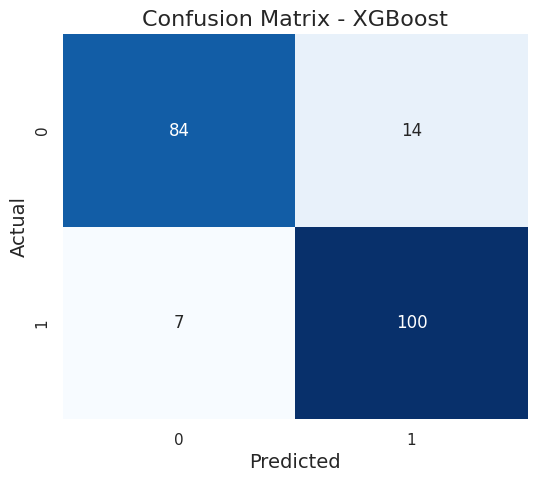

In [613]:

# Initialize model
xg = XGBClassifier(
    n_estimators=50, # reduced to prevent overfitting
    max_depth=2,
    learning_rate=0.1,
    random_state=0 )


# Train model
xg.fit(X_train, y_train)

# Predictions
y_pred_train = xg.predict(X_train)
y_pred_test = xg.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\nTraining Accuracy (XGBoost): {train_accuracy:.2%}")
print(f"Test Accuracy (XGBoost): {test_accuracy:.2%}")

# Classification report
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test))

# Cross-validation
cv_scores = cross_val_score(xg, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.2%}")
print(f"CV Std Dev: {cv_scores.std():.4f} \n")

# Plot confusion matrix (Test Set)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

# Store accuracy for comparison
xgb_accuracy = test_accuracy * 100
xgb_precision = precision_score(y_test, y_pred_test) * 100
xgb_recall = recall_score(y_test, y_pred_test) * 100
xgb_f1 = f1_score(y_test, y_pred_test) * 100


KNN


Training Accuracy (KNN): 95.85%
Test Accuracy (KNN): 88.29%

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        98
           1       0.87      0.91      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205


Cross-Validation Scores: [0.86585366 0.84146341 0.80487805 0.88414634 0.81707317]
Mean CV Accuracy: 84.27%
CV Std Dev: 0.0295 



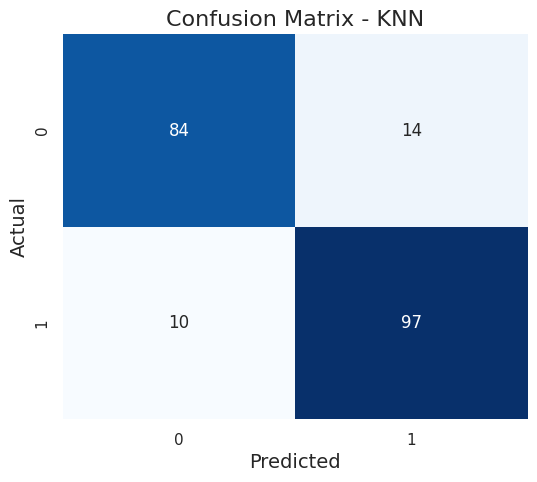

In [614]:


# Initialize model
knn = KNeighborsClassifier(n_neighbors=5)

# Train model
knn.fit(X_train, y_train)

# Predictions
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\nTraining Accuracy (KNN): {train_accuracy:.2%}")
print(f"Test Accuracy (KNN): {test_accuracy:.2%}")

# Classification report
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test))

# Cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.2%}")
print(f"CV Std Dev: {cv_scores.std():.4f} \n")

# Plot confusion matrix (Test Set)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

# Store accuracy for comparison
knn_accuracy = test_accuracy * 100
knn_precision = precision_score(y_test, y_pred_test) * 100
knn_recall = recall_score(y_test, y_pred_test) * 100
knn_f1 = f1_score(y_test, y_pred_test) * 100

Random Forest


Training Accuracy (Random Forest): 84.02%
Test Accuracy (Random Forest): 86.83%

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        98
           1       0.86      0.89      0.88       107

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205


Cross-Validation Scores: [0.87804878 0.87195122 0.81097561 0.8902439  0.80487805]
Mean CV Accuracy: 85.12%
CV Std Dev: 0.0359 



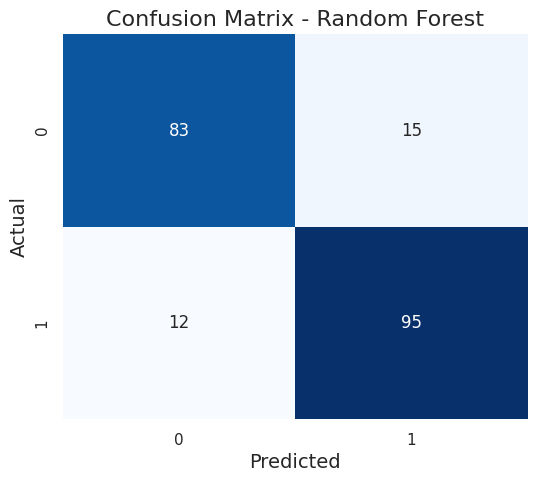

In [615]:

# Initialize model
rf = RandomForestClassifier(
    n_estimators=10,
    max_depth=3,
    random_state=0
)

# Train model
rf.fit(X_train, y_train)

# Predictions
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\nTraining Accuracy (Random Forest): {train_accuracy:.2%}")
print(f"Test Accuracy (Random Forest): {test_accuracy:.2%}")

# Classification report
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_pred_test))

# Cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.2%}")
print(f"CV Std Dev: {cv_scores.std():.4f} \n")

# Plot confusion matrix (Test Set)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

# Store accuracy for comparison
rf_accuracy = test_accuracy * 100
rf_precision = precision_score(y_test, y_pred_test) * 100
rf_recall = recall_score(y_test, y_pred_test) * 100
rf_f1 = f1_score(y_test, y_pred_test) * 100

**Visualizations comparing Classification Models**

ROC Curves - All Models

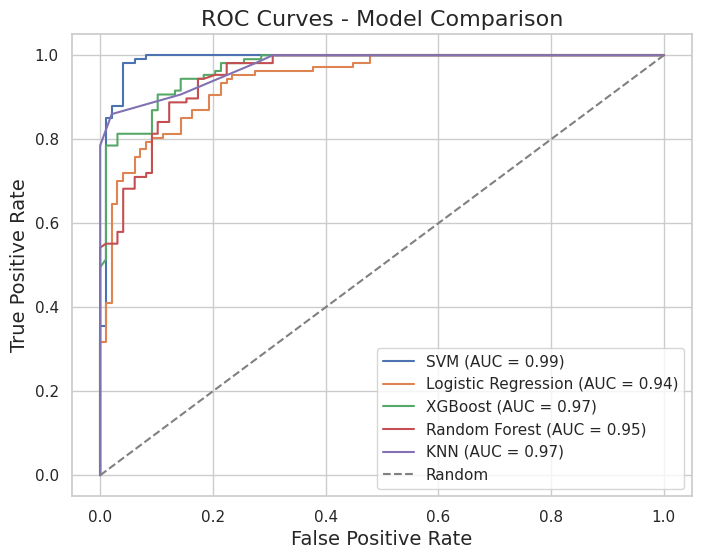

In [616]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# SVM
fpr, tpr, _ = roc_curve(y_test, svm.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')

# XGBoost
fpr, tpr, _ = roc_curve(y_test, xg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')

# Random Forest
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# KNN
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')

# Random baseline
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves - Model Comparison', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Accuracy scores

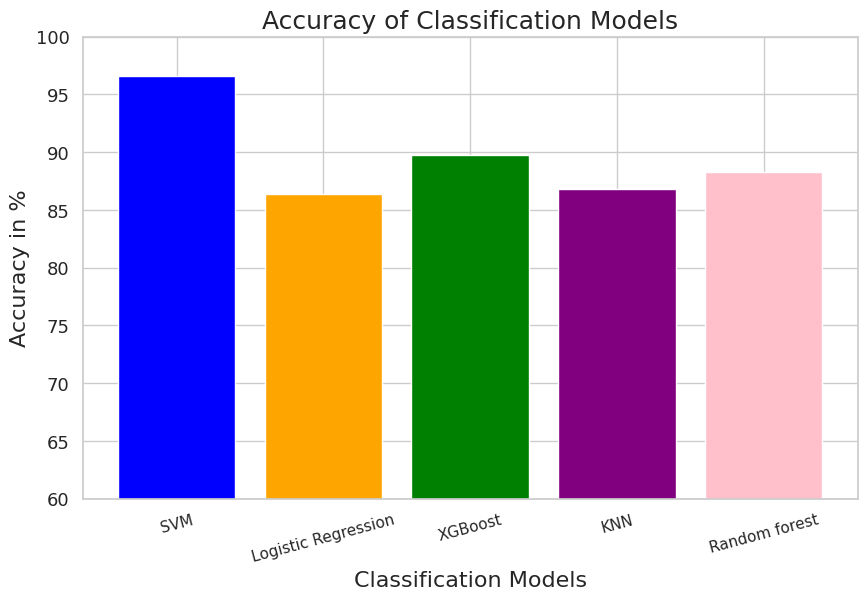

In [617]:
models = ['SVM', 'Logistic Regression', 'XGBoost','KNN', 'Random forest']
accuracy = [svm_accuracy, lr_accuracy, xgb_accuracy, rf_accuracy, knn_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['blue', 'orange', 'green', 'purple', 'pink'])
plt.xlabel('Classification Models', fontsize=16)
plt.ylabel('Accuracy in %', fontsize=16)
plt.title('Accuracy of Classification Models', fontsize=18)
plt.xticks(fontsize=11, rotation=15)
plt.yticks(fontsize=13)
plt.ylim(60, 100)
plt.show()


Line chart to compare precision, recall and f1-score

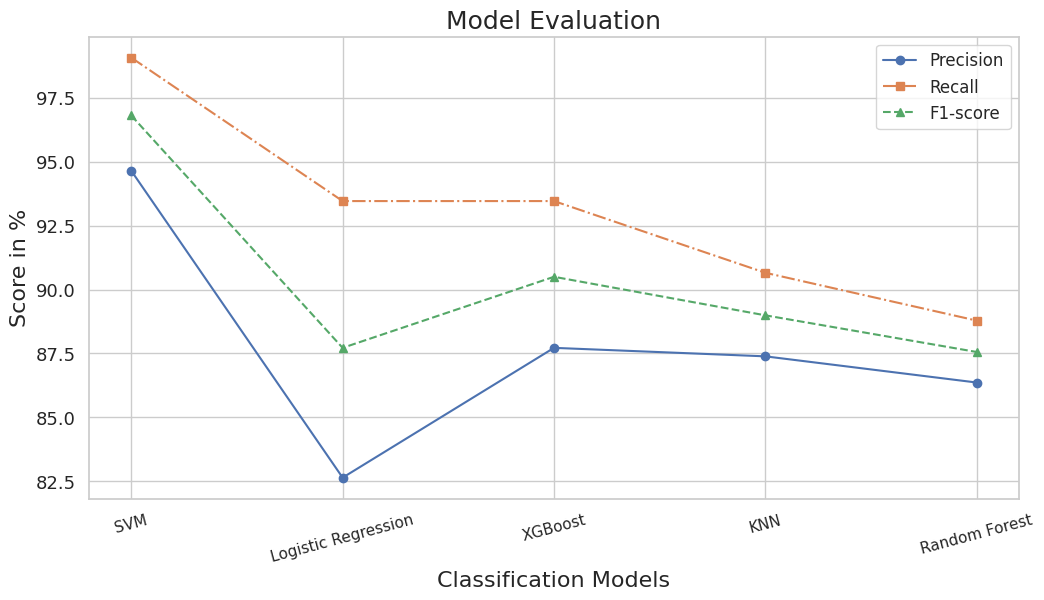

In [618]:
models = ['SVM', 'Logistic Regression', 'XGBoost', 'KNN', 'Random Forest']
precision = [svm_precision, lr_precision, xgb_precision, knn_precision, rf_precision]
recall = [svm_recall, lr_recall, xgb_recall, knn_recall, rf_recall]
f1_scores = [svm_f1, lr_f1, xgb_f1, knn_f1, rf_f1]

plt.figure(figsize=(12, 6))
plt.plot(models, precision, marker='o', label='Precision', linestyle='-')
plt.plot(models, recall, marker='s', label='Recall', linestyle='-.')
plt.plot(models, f1_scores, marker='^', label='F1-score', linestyle='--')
plt.xlabel('Classification Models', fontsize=16)
plt.ylabel('Score in %', fontsize=16)
plt.title('Model Evaluation', fontsize=18)
plt.legend(fontsize=12)
plt.xticks(fontsize=11, rotation=15)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()

